# Venta de sillas en Coppel mediante simulación

Aquí, los días lunes, martes, ..., domingo se van a representar por medio de números; de hecho, se va a proponer que los lunes son todos múltiplos del número 7.

| L | M | W | J | V | S | D | L | M | W | J  | V  | S  | D  | L  |
|---|---|---|---|---|---|---|---|---|---|--- |--- |--- |--- |--- |
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |




In [279]:
from random import random
import numpy as np
import pandas as pd
import openpyxl

# Variable aleatoria Bernoulli de parametro p.
def bernoulli(p):
	u = random()
	if u<=p:
		return 1
	else:
		return 0

# Variable aleatoria Binomial de parametros n y p.
def bin(n,p):
	if n==1:
		return bernoulli(p)
	else:
		return np.array([bernoulli(p) for i in range(n)]).sum()

# Variable aleatoria de la decision
def decision():
	u = random()
	if u<=0.6:
		return 1 # mandar a domicilio
	elif u>0.6 and u<=0.9:
		return 2 # compro las sillas en existencia
	elif u>0.9 and u<1:
		return 3 # compro sillas en existencia + sillas en CEDIS(Bodega)

def inventario(q,dias):
  q0 = q
  inv = []
  ventas = []
  encabezado = ['Inventario','Ventas']
  for i in range(dias):
    u1 = bin(6,3/6) # sillas que puede comprar para que se lleve a su domicilio
    u2 = bin(2,1/7) # compra de sillas que solo estan en la tienda
    u3 = bin(4,1/4) # compro las sillas que estaban en tienda mas otras sillas
    compra = decision() # el cliente decidio...
    if i%7==0 or (i-3)%7==0: # Los lunes y Jueves se resurte la tienda
      q = q0
      if compra==1:
        inv.append(q)
        ventas.append(u1)

      elif compra==2:
        if q-u2<0:
          ventas.append(q)
          q = 0
          inv.append(q)
        else:
          q-=u2
          inv.append(q)
          ventas.append(u2)

      elif compra==3:
        ventas.append(q+u3)
        q = 0
        inv.append(q)

    else: # si no es lunes o jueves entonces se esperan ventas
      if q>0:
        if compra==1:
          inv.append(q)
          ventas.append(u1)

        elif compra==2:
          if q-u2<0:
            ventas.append(q)
            q = 0
            inv.append(q)
          else:
            q-=u2
            inv.append(q)
            ventas.append(u2)

        elif compra==3:
          ventas.append(q+u3)
          q = 0
          inv.append(q)
      else:
        inv.append(q)
        ventas.append(0)

  return pd.DataFrame(np.array([inv,ventas]).T,columns = encabezado)

**Simulación de ventas de sillas en una tienda Coppel durante 7 días junto con su gráfica.**

            0  1  2  3  4  5  6
Inventario  2  0  0  1  1  1  1
Ventas      2  2  0  1  2  4  4 




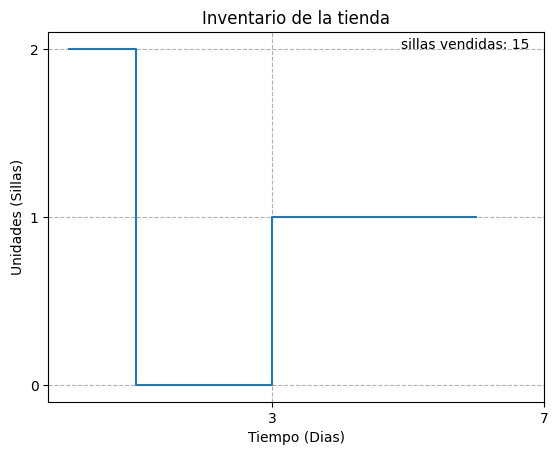

In [280]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
dias = 7 # numero de dias a simular
v = inventario(2,dias)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,dias,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( dias*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(dias+2))))
# plt.savefig("grafico1.png")
plt.show()

**Simulación de ventas de sillas en una tienda Coppel durante 14 días junto con su gráfica.**

            0   1   2   3   4   5   6   7   8   9   10  11  12  13
Inventario   2   2   2   2   2   0   0   0   0   0   0   0   0   0
Ventas       1   1   3   0   4   3   0   3   0   0   3   0   0   0 




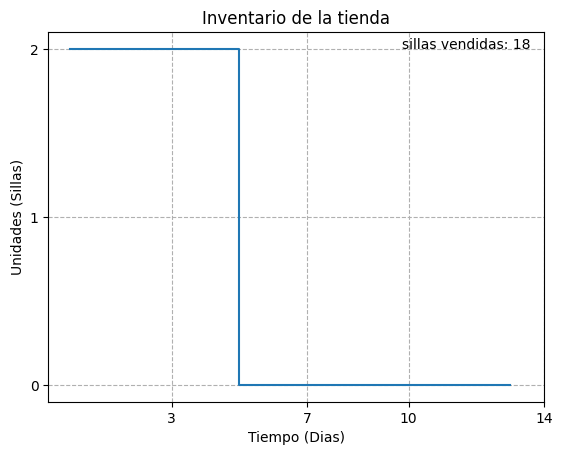

In [281]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
dias = 14 # numero de dias a simular
v = inventario(2,dias)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,dias,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( dias*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(dias+2))))
# plt.savefig("grafico1.png")
plt.show()

**Simulación de ventas de sillas en una tienda Coppel durante $T$ días junto con su gráfica.**

            0   1   2   3   4   5   6   7   8   9   ...  50  51  52  53  54  \
Inventario   2   2   2   2   0   0   0   2   2   2  ...   2   2   2   2   2   
Ventas       3   2   5   2   2   0   0   2   0   4  ...   3   3   1   1   0   

            55  56  57  58  59  
Inventario   0   2   2   2   2  
Ventas       3   4   4   5   2  

[2 rows x 60 columns] 




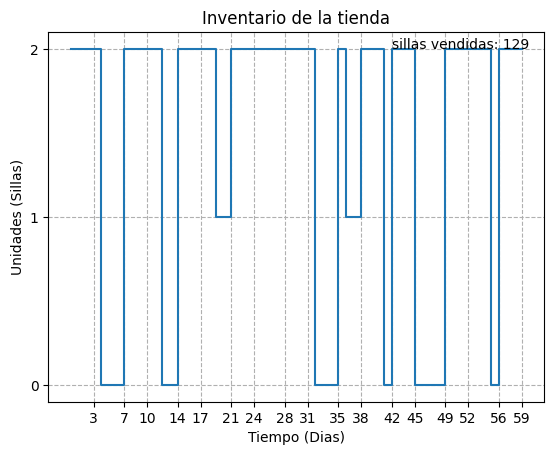

In [282]:
import matplotlib.pyplot as plt

# Primero se hace la simulacion, se imprime la tabla y luego se realiza la grafica
T = 60 # numero de dias a simular
v = inventario(2,T)
print(v.T,"\n\n")


# Grafica
fig , ax = plt.subplots()

plt.step(np.arange(0,T,1),v['Inventario'],where='post')
ax.set_yticks(range(v['Inventario'].min(),v['Inventario'].max()+1))
plt.title('Inventario de la tienda')
plt.xlabel('Tiempo (Dias)')
plt.ylabel('Unidades (Sillas)')
plt.text( T*0.7 , 2 , 'sillas vendidas: {}'.format(v['Ventas'].sum()))
ax.grid(linestyle = 'dashed')

def indice(i):
  if i%7==0 or (i-3)%7==0:
    return i
ax.set_xticks(list(filter(indice,range(T+2))))
# plt.savefig("grafico1.png")
plt.show()

**CEDIS Coppel le distribuye a las siguientes tiendas**

In [283]:
tiendas = pd.read_csv("https://raw.githubusercontent.com/AyaxYordi/archivos-csv-o-excel/main/tiendas%20coppel.csv")
tiendas

,Coppel,Stock,Delegacion
0,Santa Martha,2,Iztapalapa
1,Fernando Arruti,2,Iztapalapa
2,Tepalcates,2,Iztapalapa
3,Plaza central,2,Iztapalapa
4,Purisima,2,Iztapalapa
5,Plaza Ermita,2,Iztapalapa
6,Atlalilco,2,Iztapalapa
7,Granjas Esmeralda,2,Iztapalapa
8,Del Moral,2,Iztapalapa
9,Tezontle,2,Iztacalco


In [284]:
def sim(dias,tabla):
  A = np.zeros((len(tabla.index),dias))
  for j in range(len(tabla.index)):
    A[j] = inventario(2,dias)['Ventas']
  return pd.DataFrame(A , index = tabla.iloc[0:,0],dtype=int)

B = sim(7,tiendas)
A = pd.DataFrame(B.sum(),index=np.arange(0,len(B.columns),1),columns=["Total de ventas"]).T

pd.concat([B,A])

,0,1,2,3,4,5,6
Santa Martha,2,1,2,0,4,4,2
Fernando Arruti,2,0,0,3,1,2,4
Tepalcates,3,3,5,0,2,3,0
Plaza central,1,0,0,4,3,1,4
Purisima,1,2,4,3,3,0,0
Plaza Ermita,5,2,0,0,3,3,2
Atlalilco,4,0,0,4,0,3,0
Granjas Esmeralda,3,5,0,4,3,0,0
Del Moral,1,0,2,3,4,5,0
Tezontle,0,3,1,3,3,0,0


**Ventas por dia de todas las tiendas**

In [285]:
pd.DataFrame(B.sum(),columns = ["Total de ventas por dia:"]).T

,0,1,2,3,4,5,6
Total de ventas por dia:,37,25,20,42,32,32,20


**Se calcula el número de sillas vendidas por todas las tiendas en una semana.**

In [286]:
print("Total de sillas vendidas por todas las tiendas en una semana:",B.sum().sum())

Total de sillas vendidas por todas las tiendas en una semana: 208


**Simulacion para ventas de sillas en promedio durante una semana**

In [287]:
print("Promedio de sillas vendidas por semana entre todas las tiendas:",np.array([sim(7,tiendas).sum().sum() for i in range(2000)]).mean())

Promedio de sillas vendidas por semana entre todas las tiendas: 198.626


**Media y desviación estandar de las ventas de sillas de todas las tiendas durante $T$ dias**

In [288]:
print("Media:",round(sim(6000,tiendas).sum().mean(),2))
print("Desviacion estandar:",round(sim(6000,tiendas).sum().std(),2))

Media: 28.28
Desviacion estandar: 7.28


**Histograma de densidad de las ventas de sillas de todas las tiendas durante $T$ dias**

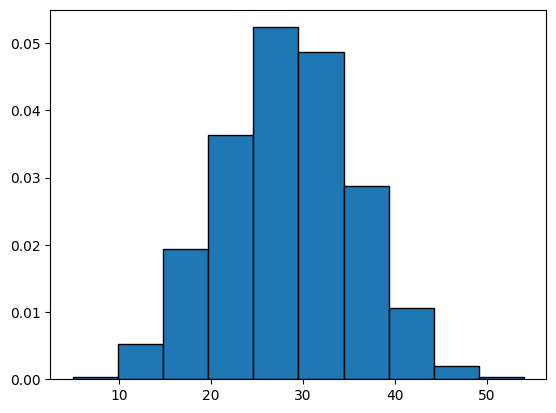

In [289]:
T = 5000 # dias
plt.hist(np.array(sim(T,tiendas).sum()), density=True,edgecolor='black')
# plt.savefig('inv1.png')
plt.show()

Con la media y la desviación estándar calculados recientemente se procede a realizar un histograma de densidad de una distribución normal usando estos datos y se va a comparar con el histograma de las ventas simuladas.

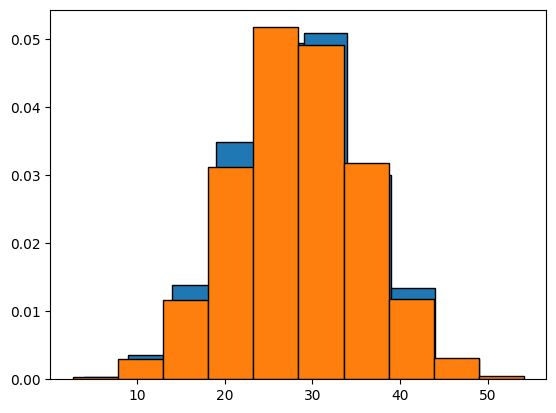

In [290]:
from random import normalvariate as N
from math import ceil

plt.hist( np.array(sim(T,tiendas).sum()) , density = True , edgecolor ='black')
plt.hist( np.array([N(28.28,7.23) for i in range(T)]) , density = True , edgecolor='black')
# plt.savefig('inv2.png')
plt.show()

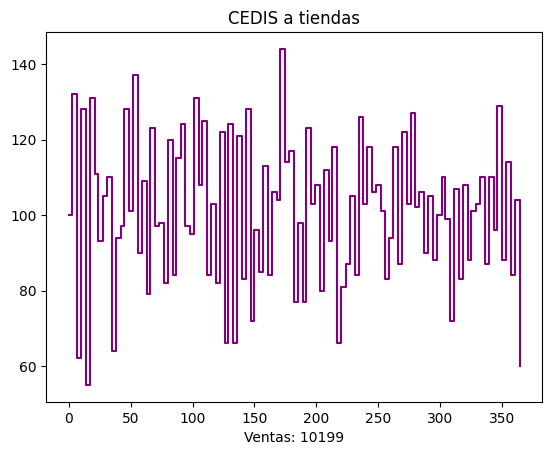

In [291]:
from random import normalvariate as N
from math import floor
import numpy as np
import matplotlib.pyplot as plt

def inv(dias):
	q0 = 198
	q = 0
	v = []
	s = []
	for k in range(dias):
		if k%7==0:
			u1 = floor(sum([N(28,7.4) for i in range(4)]))
			s.append(u1)
			q = q0 - u1
			v.append(q)
		elif (k-3)%7==0:
			u2 = floor(N(28,7.4)+N(28,7.4)+N(28,7.4))
			s.append(u2)
			q = q0 - u2
			v.append(q)
		else:
			v.append(q)
	return [v,s]

T = 365 # dias
w = inv(T)
plt.title('CEDIS a tiendas')
plt.step([i for i in range(T)],w[0],where='post',color='purple')
plt.xlabel('Ventas: {}'.format(np.array(w[1]).sum()))
# plt.savefig('inv3.png')
plt.show()